<a href="https://colab.research.google.com/github/ArtemGonch/lab_work_Goncharov_Artem/blob/dev/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [81]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 193MB/s]


Начнем с необходимых приготовлений.

In [82]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [83]:
# Paste your code here
coins = pd.read_csv('coins.csv', index_col='date')

Посмотрим что получилось

In [84]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [85]:
# Paste your code here
coins['name'].nunique()

70

### 2. За какой период данные мы имеем? (0.4 балла)

In [86]:
# Paste your code here
print(pd.to_datetime(coins.index).max() - pd.to_datetime(coins.index).min())

1865 days 00:00:00


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [88]:
# Paste your code here
print((coins.isna().sum()))
print('Пропуски могут быть вызваны отсутствием информации по данным монетам на рынке или некорректным заполнением данных')

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64
Пропуски могут быть вызваны отсутствием информации по данным монетам на рынке или некорректным заполнением данных


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [89]:
# Paste your code here
max_price = coins['high'].max()
max_coin = coins.loc[coins['high'] == max_price, 'name'].iloc[0]
max_date = coins.loc[coins['high'] == max_price].index[0]
print(f"Самая высокая цена {max_price} была достигнута у монеты {max_coin} в дату {max_date}.")

Самая высокая цена 20089.0 была достигнута у монеты Bitcoin в дату 2017-12-17.


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

Самая высокая средняя капитализация у монеты Bitcoin.
Самая низкая средняя капитализация у монеты KingN Coin.
График выведем только для 3 топовых монет, потому что если выводить все, то ничего не видно(все размывается)


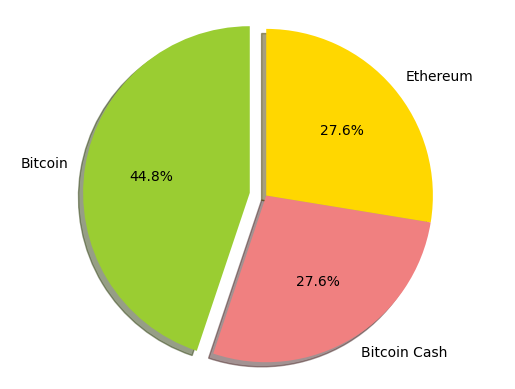

In [119]:
# Paste your code here
mean_cap = coins.groupby('name')['market'].mean()
max_coin = mean_cap.idxmax()
min_coin = mean_cap.idxmin()
print(f"Самая высокая средняя капитализация у монеты {max_coin}.")
print(f"Самая низкая средняя капитализация у монеты {min_coin}.")
print('График выведем только для 3 топовых монет, потому что если выводить все, то ничего не видно(все размывается)')
top_three = mean_cap.sort_values(ascending=False)[:3]
labels = top_three.index.tolist()
sizes = top_three.tolist()
colors = ['yellowgreen', 'lightcoral', 'gold']
explode = [0.1 if i == max(sizes) else 0 for i in sizes]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [103]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    # Paste your code here
    coins = pd.read_csv('coins.csv')
    coins['date'] = pd.to_datetime(coins['date'])
    # загрузка данных    
    # фильтрация данных по выбранной валюте и диапазону дат
    coins = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]
    
    # создание нового столбца с датами в формате matplotlib
    coins['date_mpl'] = coins['date'].apply(lambda x: pd.to_datetime(x).date().strftime('%Y-%m-%d'))
    
    # создание новых столбцов с ценами открытия, закрытия, минимальной и максимальной за день
    ohlc = coins[['date_mpl', 'open', 'high', 'low', 'close']].copy()
    
    # установка размера графика
    plt.figure(figsize=(12, 6))
    
    # построение графика свечей
    plt.plot(ohlc['date_mpl'], ohlc['open'], color='green', label='Open')
    plt.plot(ohlc['date_mpl'], ohlc['close'], color='red', label='Close')
    plt.plot(ohlc['date_mpl'], ohlc['high'], color='black', label='High')
    plt.plot(ohlc['date_mpl'], ohlc['low'], color='blue', label='Low')
    
    # добавление подписей и сетки
    plt.title(f'{symbol} Price Action from {start_date} to {end_date}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # отображение графика
    plt.show()

Посмотрим, что получилось:

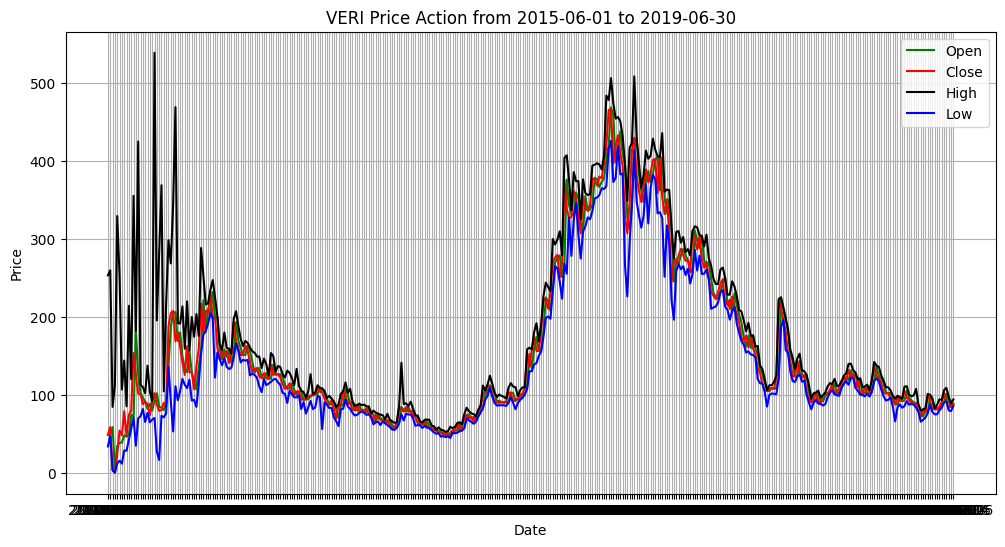

In [121]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2015-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [105]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    # Paste your code here
    coins = pd.read_csv('coins.csv')
    # фильтрация данных по выбранной валюте и диапазону дат
    coins = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]
    
    # создание нового столбца с отношением максимальной цены к максимуму из цен открытия и закрытия
    coins['pnd'] = coins['high'] / coins[['open', 'close']].max(axis=1)
    
    # поиск максимального значения pnd и соответствующей даты
    max_pnd = coins['pnd'].max()
    max_pnd_date = coins.loc[coins['pnd'] == max_pnd, 'date'].iloc[0]
    
    # вывод результата
    print(f'Монета {symbol}; промежуток: {start_date} и {end_date}; дата самого сильного pumpndump: {max_pnd_date} со значением: {max_pnd:.2f}')

In [106]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

Монета BTC; промежуток: 2017-06-01 и 2018-06-01; дата самого сильного pumpndump: 2017-11-29 со значением: 1.14


Сравните эти значения для разных монет:

In [107]:
find_most_severe_pump_and_dump(coins, symbol='VERI', start_date='2017-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='LTC', start_date='2017-06-01', end_date='2018-06-01')
find_most_severe_pump_and_dump(coins, symbol='ETH', start_date='2017-06-01', end_date='2018-06-01')

Монета VERI; промежуток: 2017-06-01 и 2018-06-01; дата самого сильного pumpndump: 2017-06-11 со значением: 33.55
Монета LTC; промежуток: 2017-06-01 и 2018-06-01; дата самого сильного pumpndump: 2018-02-07 со значением: 1.11
Монета ETH; промежуток: 2017-06-01 и 2018-06-01; дата самого сильного pumpndump: 2017-07-18 со значением: 1.14


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [108]:
def compute_roi(coins, investments, start_date, end_date):
    # Paste your code here
    coins = pd.read_csv('coins.csv')
    coins = coins[(coins['date'] >= start_date) & (coins['date'] <= end_date)]
    coins = coins[coins['symbol'].isin(investments.keys())]

    initial_value = sum([investments[coin] / coins[coins['symbol'] == coin]['close'].iloc[0] for coin in investments])
    final_value = sum([investments[coin] / coins[coins['symbol'] == coin]['close'].iloc[-1] for coin in investments])
    roi = (final_value - initial_value) / initial_value

    return roi

In [109]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.015216400989318568

In [110]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

-0.9748959774548989

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [111]:
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here
    coins = pd.read_csv('coins.csv')
    coin_df = coins[coins['symbol'] == symbol].reset_index(drop=True)
    coin_df['rolling_mean'] = coin_df['close'].rolling(window=window).mean()
    coin_df['rolling_std'] = coin_df['close'].rolling(window=window).std()

    coin_df['upper_band'] = coin_df['rolling_mean'] + (width * coin_df['rolling_std'])
    coin_df['lower_band'] = coin_df['rolling_mean'] - (width * coin_df['rolling_std'])

    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(coin_df['date'], coin_df['close'], label='Price')
    ax.plot(coin_df['date'], coin_df['rolling_mean'], label=f'{window}-day Moving Average')
    ax.plot(coin_df['date'], coin_df['upper_band'], label=f'{width}-sigma Bollinger Band(upper_band)')
    ax.plot(coin_df['date'], coin_df['lower_band'], label=f'{width}-sigma Bollinger Band(lower_band)')

    ax.set_xlabel('Date')
    ax.set_ylabel('Price (USD)')
    ax.set_title(f'{symbol} Price with Bollinger Bands ({window}-day MA, {width}-sigma)')
    ax.legend(loc='upper left')

    plt.show()

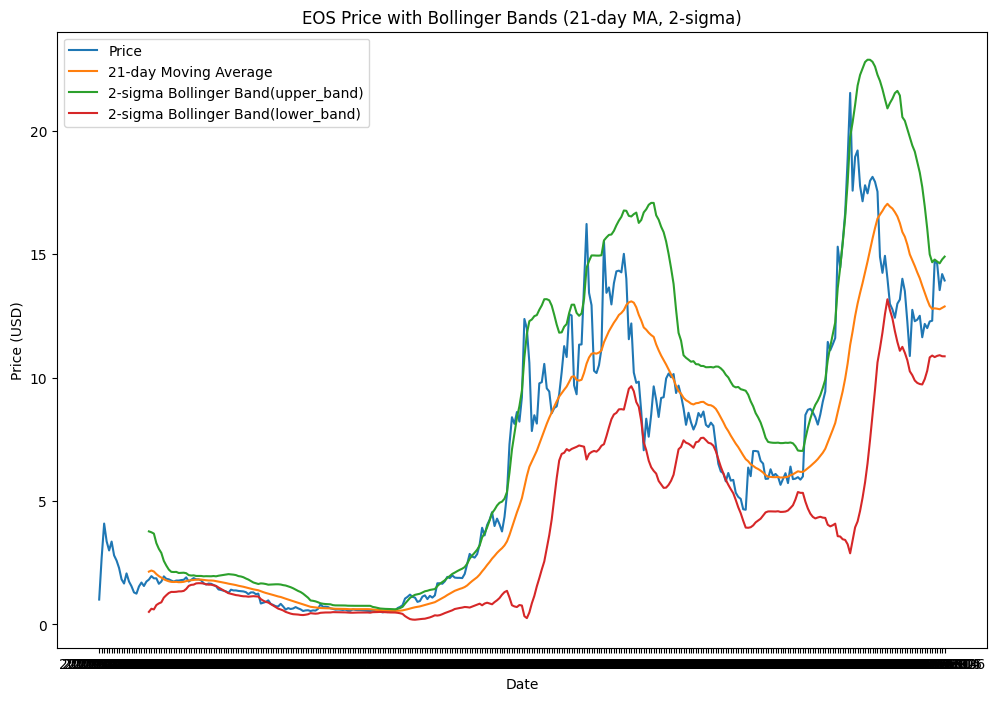

In [112]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Есть места, где правило нарушается, но в целом(с учетом погрешностей), цена, подходя к границе, отражается, так что правило(с учетом погрешностей) выполняется.


## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [113]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here
    coins = pd.read_csv('coins.csv')
    coins = coins[coins['date'] >= start_date]
    coins_data = coins[coins['symbol'].isin(symbols)]
    total_market_cap = coins_data.groupby('date')['market'].sum()
    plt.plot(total_market_cap.index, total_market_cap)
    plt.title('Total market capitalization')
    plt.xlabel('Date')
    plt.ylabel('Market cap (USD)')
    plt.show()

    market_share = coins_data.groupby(['date', 'symbol'])['market'].sum()
    market_share = market_share.unstack().fillna(0)
    market_share = market_share.div(total_market_cap, axis=0)

    market_share.plot.area()
    plt.title('Market share of cryptocurrencies')
    plt.xlabel('Date')
    plt.ylabel('Market share')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

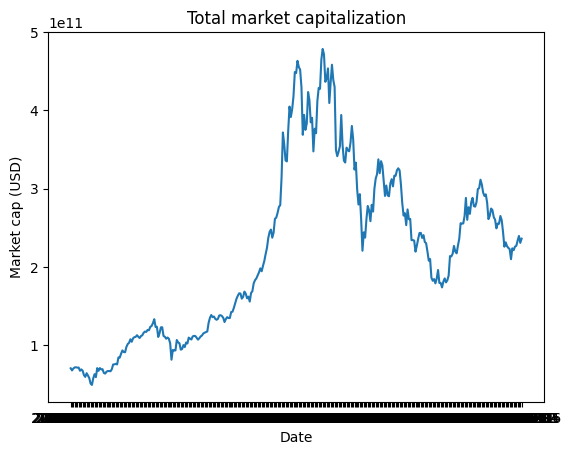

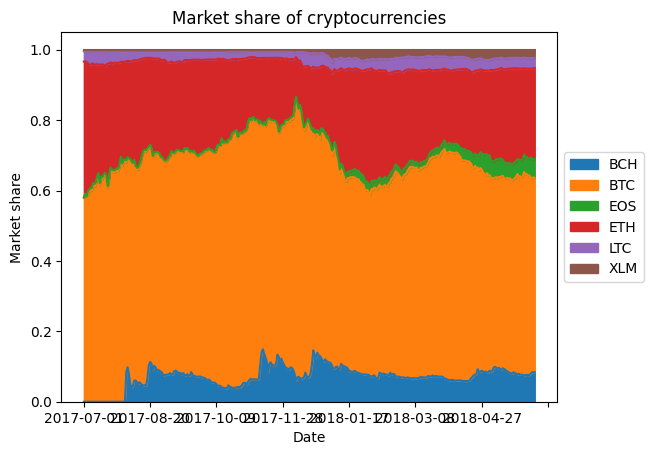

In [114]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [115]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here
    coins = pd.read_csv('coins.csv')
    coins = coins[coins['symbol'].isin(symbols)]
    coins = coins.set_index('date')
    coins = coins.sort_index()

    smoothed_prices = {}
    for symbol in symbols:
        prices = coins[coins['symbol'] == symbol]['market']
        smoothed_prices[symbol] = prices.ewm(alpha=alpha, min_periods=window).mean()

    corr_matrix = pd.DataFrame(index=symbols, columns=symbols)
    for i in range(len(symbols)):
        for j in range(i, len(symbols)):
            symbol1 = symbols[i]
            symbol2 = symbols[j]
            corr_matrix.loc[symbol1, symbol2] = np.corrcoef(smoothed_prices[symbol1][-(window+1):-1], 
                                                            smoothed_prices[symbol2][-(window+1):-1])[0, 1]
            corr_matrix.loc[symbol2, symbol1] = corr_matrix.loc[symbol1, symbol2]

    return corr_matrix

In [116]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-116-5cb301b2dfa8>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.99,0.94,1.00,0.99,1.00,0.99
ETH,0.99,1.00,0.88,0.98,0.96,0.98,0.96
EOS,0.94,0.88,1.00,0.95,0.96,0.94,0.97
BCH,1.00,0.98,0.95,1.00,1.00,1.00,1.00
XLM,0.99,0.96,0.96,1.00,1.00,1.00,1.00
LTC,1.00,0.98,0.94,1.00,1.00,1.00,1.00
ADA,0.99,0.96,0.97,1.00,1.00,1.00,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [117]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-117-c2d058096282>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.99,0.94,1.00,0.99,1.00,0.99
ETH,0.99,1.00,0.88,0.98,0.96,0.98,0.96
EOS,0.94,0.88,1.00,0.95,0.96,0.94,0.97
BCH,1.00,0.98,0.95,1.00,1.00,1.00,1.00
XLM,0.99,0.96,0.96,1.00,1.00,1.00,1.00
LTC,1.00,0.98,0.94,1.00,1.00,1.00,1.00
ADA,0.99,0.96,0.97,1.00,1.00,1.00,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

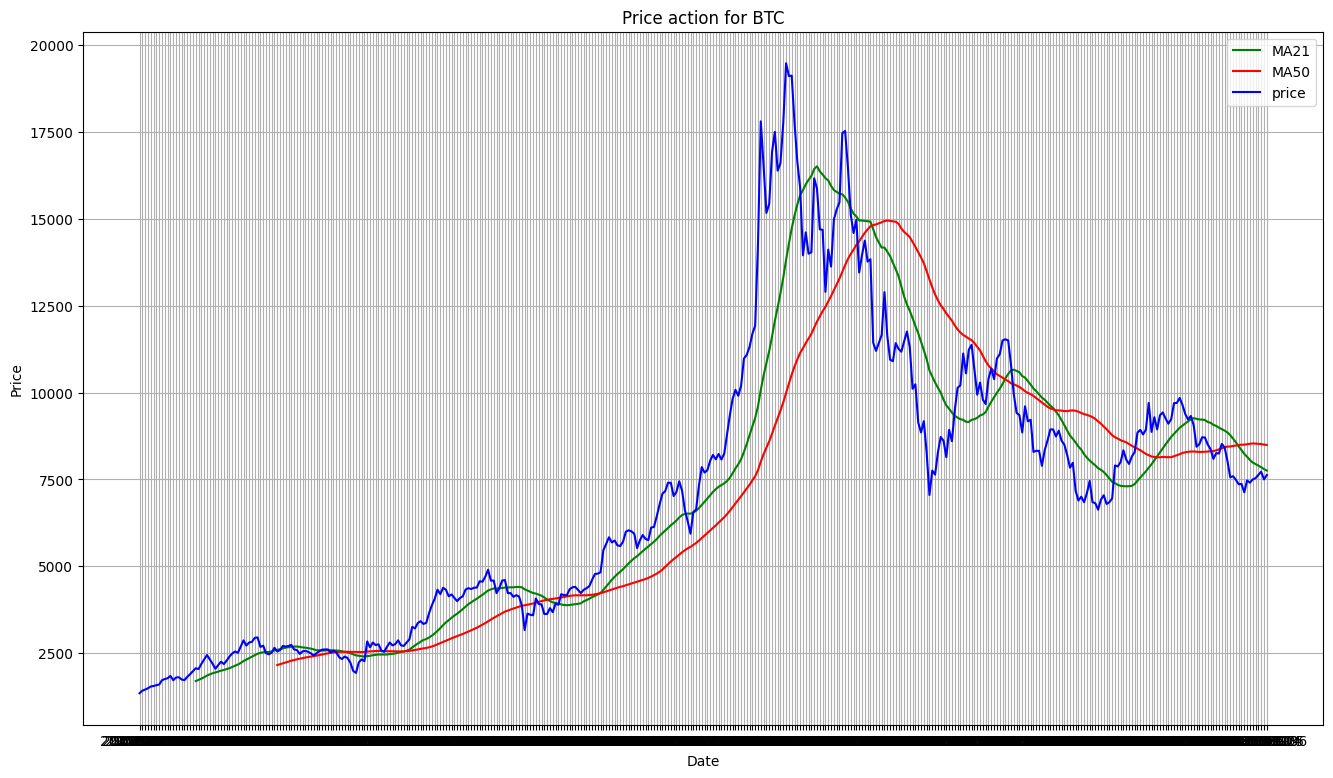

In [118]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.